<a href="https://colab.research.google.com/github/Mdanish2020/Yes_Bank_Stock_closing_Price_Prediction/blob/main/ML_Capstone_project(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month </b>

<b>"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"</b>

We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

<b>Univariate Analysis</b>:

<b>Bivariate Analysis</b>:

<b>Introducing hypothesis</b>:

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### <b> LET'S INVITE OUR DATASET</b>

In [2]:
#Import dataset
stock_df = pd.read_csv('/content/drive/MyDrive/Data/data_YesBank_StockPrices.csv')

In [3]:
#Reading first 5 rows of dataset
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
#get the number of rows and columns in the dataset 
stock_df.shape

(185, 5)

We have 185 instances in our dataset and 5 columns on which we are going to work on.

In [5]:
#Getting all info about our dataset
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Hurray! There is no null values in any instances.**

But **Date** have values in object data type. So, we need to convert it into proper date format.

## <b> Performing some feature Engineering</b>

In [6]:
#importing datetime
from datetime import datetime
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [7]:
#introducing new features of name year
stock_df['Year'] = stock_df['Date'].apply(lambda z: z.strftime('%Y'))

In [8]:
#changing datatypes of features Month and Year
stock_df['Year'] = stock_df['Year'].astype(int)

In [9]:
stock_df.head(3)

,Date,Open,High,Low,Close,Year
0,2005-07-01,13.00,14.00,11.25,12.46,2005
1,2005-08-01,12.58,14.88,12.55,13.42,2005
2,2005-09-01,13.48,14.87,12.27,13.30,2005


In [10]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Year    185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 8.8 KB


In [11]:
#Descriptive Statistics
stock_df.describe()

,Open,High,Low,Close,Year
count,185.000000,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703,2012.702703
std,98.879850,106.333497,91.219415,98.583153,4.471315
min,10.000000,11.240000,5.550000,9.980000,2005.000000
25%,33.800000,36.140000,28.510000,33.450000,2009.000000
50%,62.980000,72.550000,58.000000,62.540000,2013.000000
75%,153.000000,169.190000,138.350000,153.300000,2017.000000
max,369.950000,404.000000,345.500000,367.900000,2020.000000


As it is clearly shown in the descriptive statistics table, there is very high variation within features like **High**, **Low** and **Close**. 



In [12]:
#cheking is there any duplication in our data.
len(stock_df[stock_df.duplicated()])

0

There is no duplication in our data which is a good sign otherwise we have to deal with that too.

## <b> VISUALIZING THE DEPENDENT VARIABLE</B>

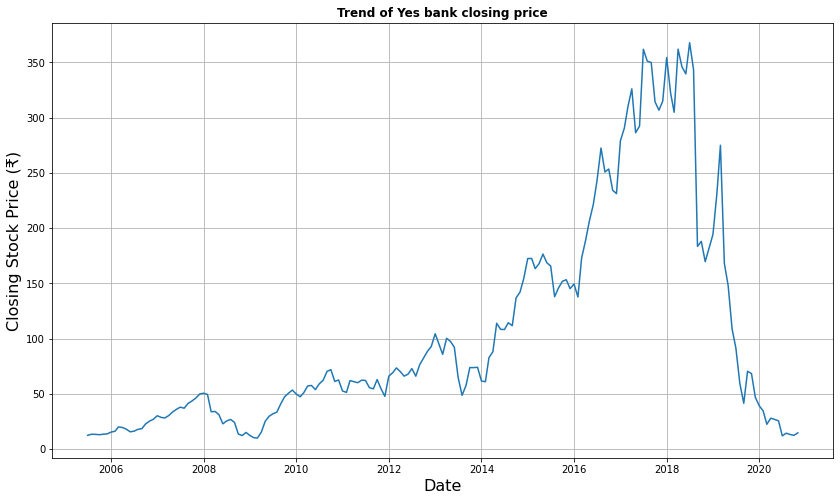

In [13]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(stock_df['Date'],stock_df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

Text(0, 0.5, 'Density')

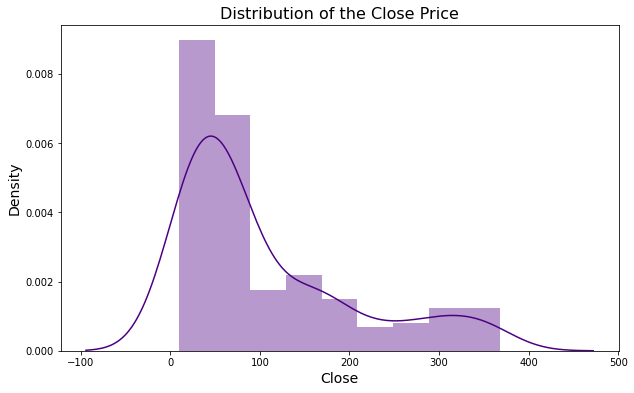

In [14]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(stock_df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)


The distribution of Stock Closing Price is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying **Log Transformation** then we'll have a look how this data behave.

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

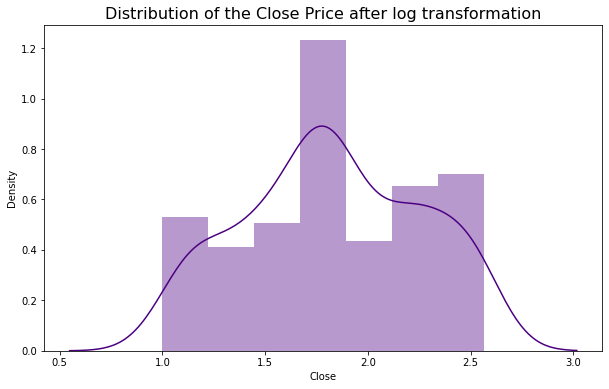

In [15]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(stock_df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [16]:
features = ['Open','Low','High']

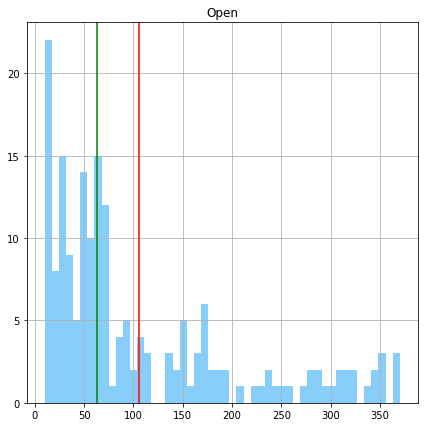

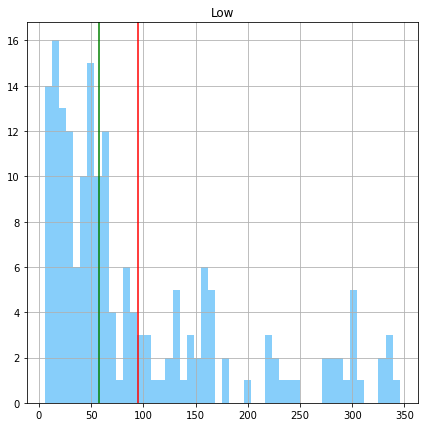

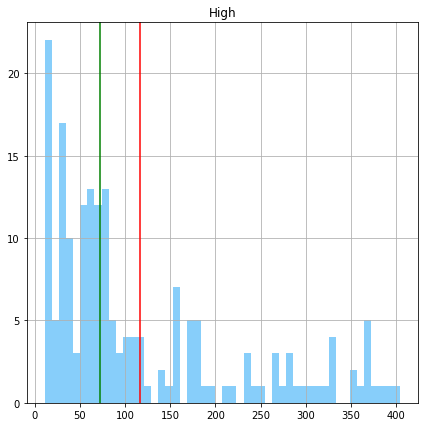

In [17]:
# tring to draw histogram for each variable 
for col in features:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  ax.grid()
  plt.hist(stock_df[col],bins = 50, color = 'lightskyblue')
  ax.axvline(stock_df[col].mean(),color = 'r')
  ax.axvline(stock_df[col].median(),color = 'green')
  ax.set_title(col)
plt.show()

Most of the features are positively skewed here. So, again we have to apply log transformation on these features. Red line represent mean and green line represent median in the above graphs and it seems these graphs are not normally distributed.

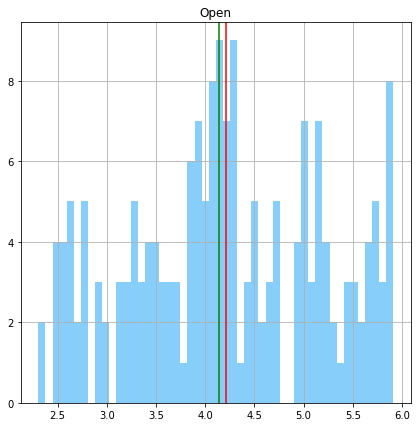

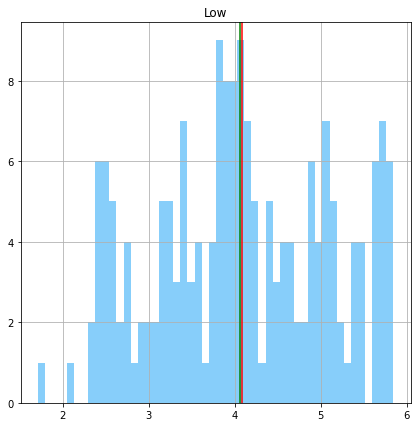

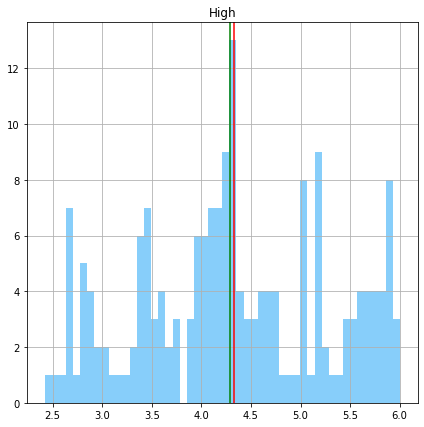

In [18]:
#to know the distribution of different features

for col in features:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  ax.grid()
  log_df = np.log(stock_df[col])
  plt.hist(log_df,bins = 50, color = 'lightskyblue')
  ax.axvline(log_df.mean(),color = 'r')
  ax.axvline(log_df.median(),color = 'green')
  ax.set_title(col)
plt.show()

After **log transformation**, now it looks approximately normally distributed to me and if you'll observe statistically: mean and median are always close to each other.

## **BIVARIATE ANALYSIS**


Text(0.5, 1.0, 'Correlation map.')

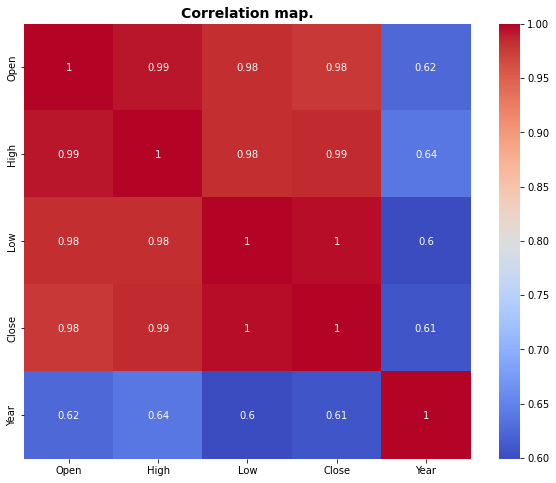

In [19]:
#  correlation map 
plt.figure(figsize = (10,8))
correlation = stock_df.corr()
sns.heatmap(abs(correlation),cmap = 'coolwarm',annot = True)
plt.title("Correlation map.",fontweight = 'bold',fontsize = 14)

In [20]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [21]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Date']]])

,Variables,VIF
0,Open,288.855336
1,High,325.130362
2,Low,434.969187
3,Close,435.438161
4,Year,2.283442


In [22]:
stock_df_dup = stock_df.copy()

In [23]:
stock_df_dup['Average'] = (stock_df_dup['Low'] + stock_df_dup['High'])/2

In [24]:
stock_df_dup['Month'] = stock_df_dup['Date'].apply(lambda y: y.strftime('%m'))
stock_df_dup['Month'] = stock_df_dup['Month'].astype(int)

In [25]:
stock_df_dup.head(3)

,Date,Open,High,Low,Close,Year,Average,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,12.625,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,13.715,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,13.570,9


In [26]:
stock_df_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     185 non-null    datetime64[ns]
 1   Open     185 non-null    float64       
 2   High     185 non-null    float64       
 3   Low      185 non-null    float64       
 4   Close    185 non-null    float64       
 5   Year     185 non-null    int64         
 6   Average  185 non-null    float64       
 7   Month    185 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 11.7 KB


Text(0.5, 1.0, 'Correlation map.')

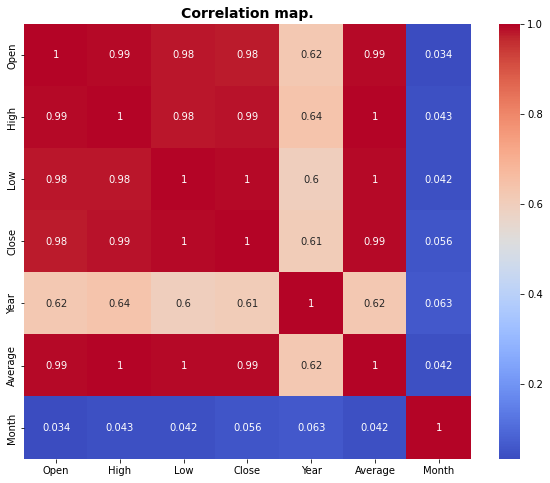

In [27]:
#  correlation map 
plt.figure(figsize = (10,8))
correlation = stock_df_dup.corr()
sns.heatmap(abs(correlation),cmap = 'coolwarm',annot = True)
plt.title("Correlation map.",fontweight = 'bold',fontsize = 14)

There is not much correlation in Month and Close price so it's better to drop Month feature 

In [28]:
#Calculating VIF after introducing some feature
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Month']]])

,Variables,VIF
0,Open,175.772464
1,High,inf
2,Low,inf
3,Year,2.246542
4,Average,inf


 Still we have very high VIF in High, Low and Average so we should try to drop one of them.

In [29]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Month','High']]])

,Variables,VIF
0,Open,175.772464
1,Low,250.255229
2,Year,2.246542
3,Average,584.964887


Again we have to drop one them. We choose the feature which one have high VIF.

In [30]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Month','High','Average']]])

,Variables,VIF
0,Open,67.510494
1,Low,65.730608
2,Year,2.154678


In [31]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Month','High','Low','Open']]])

,Variables,VIF
0,Year,2.163487
1,Average,2.163487


Now we have VIF less than 5 which is good but we drop too many features which can lead to wrong prediction but first of all we'll train our model with these 2 features.

Here we have only 5 features and we have to give prediction on the basis of 4 features and we cannot drop any feature because each vaiable is important in perspective of regression analysis. 

Despite having high VIF(variance inflation factor) which means high collinearity in our independent dataset we cannot drop any of them.

We'll move forward with these features.

## **Linear Regression**

In [32]:
#Installing scipy 
!pip install scipy

In [67]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = stock_df_dup[['Average','Year']].apply(zscore)

In [68]:
#applying log on dependent variable 
y = np.log10(stock_df_dup['Close'])

In [35]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [69]:
#Split our data into train and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 2)
X_test:  (37, 2)
y_train:  (148,)
y_test:  (37,)


In [70]:
#Applying Linear Regression 
lr = LinearRegression()
reg = lr.fit(X_train,y_train)

In [71]:
#Checking efficiency of training model
reg.score(X_train,y_train)

0.8230369471532174

In [72]:
#getting regression coefficients 
intercept = reg.intercept_
coeffs = reg.coef_
reg_coeffs = np.append(coeffs,intercept)

#making data frame of coefficients 
coefficients = pd.DataFrame()
betas = ("beta_0","beta_1",'beta_2')
coefficients["Regressors"] = betas
coefficients["Values"] = [i for i in reg_coeffs]
coefficients

,Regressors,Values
0,beta_0,0.346669
1,beta_1,0.052993
2,beta_2,1.829929


In [73]:
#Predict y_test on the basis of train sets
y_pred = reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.45006373 1.64206648 2.57784913 1.61336199 1.69738026 1.77092122
 2.5993626  1.54253488 1.63632414 1.52364343 1.6567351  2.05007317
 1.49803437 1.8339102  2.24561314 1.59164711 2.40735281 2.67914403
 2.73929905 1.41010052 1.63627113 1.78490416 1.62619995 2.07580591
 1.60046364 2.32404469 1.4615237  1.71131385 1.99359325 1.73240336
 1.67737924 2.41027877 2.5444552  2.06736025 1.98346906 1.75225937
 1.46571119]


In [41]:
reg.score(X_test,y_pred)

1.0

In [75]:
#Calculating MSE and RMSE
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)

Mean Squared Error:  0.038122814289014643
Root Mean Squared Error:  0.19525064478514442


In [76]:
#Calculating r2_Score 
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

R2:  0.8156472985215374
Adjusted R2:  0.8048030219639808


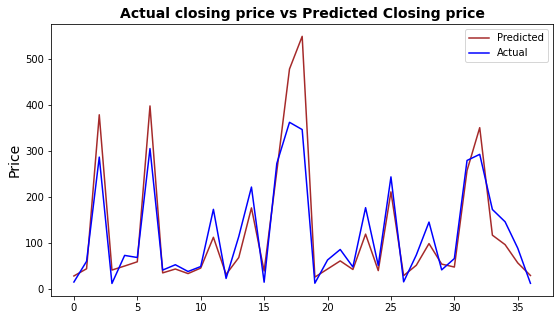

In [78]:
plt.figure(figsize=(9,5))
plt.plot(10**y_pred,color = 'brown')
plt.plot(np.array(10**y_test),color = "blue")
plt.legend(["Predicted","Actual"])
plt.ylabel("Price",fontsize = 14)
plt.title("Actual closing price vs Predicted Closing price",fontweight = 'bold',fontsize = 14)
plt.show()

Here, We can see it is completely overfitted scenario, now we have to move towards Ridge, Lasso and ElasticNet regression.

## **LASSO REGRESSION**

In [79]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
lasso.score(X_train, y_train)

0.8230368855495239

In [81]:
# Cross Validation 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [82]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.03218611492876973


In [83]:
y_pred_lasso = lasso_regressor.predict(X_test)

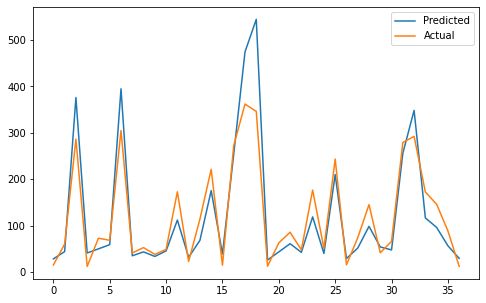

In [84]:
plt.figure(figsize=(8,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [85]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.038147607368758815
RMSE : 0.19531412485726377
R2 : 0.8155274051895772
Adjusted R2 :  0.8046760760830818


## **Ridge Regression**

In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [89]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 2}

Using  {'alpha': 2}  the negative mean squared error is:  -0.032168295545602285


In [90]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [91]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.03859278869193024
RMSE : 0.19645047389082634
R2 : 0.813374616076155
Adjusted R2 :  0.8023966523159288


In [92]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [93]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
elasticnet.score(X_train, y_train)

0.7975044211442565

In [95]:
print('Intercept of Elastic Model: ',elasticnet.intercept_)
print('Regressors of Elastic Model: ',elasticnet.coef_)

Intercept of Elastic Model:  1.8270555507696384
Regressors of Elastic Model:  [0.29002296 0.03797456]


In [96]:
y_pred_en = elasticnet.predict(X_test)

In [97]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.045171267930630726
RMSE : 0.212535333369844
R2 : 0.7815626829360593
Adjusted R2 :  0.7687134289911217


In [98]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [99]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.3}

Using  {'alpha': 0.01, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.032162344344954054


In [100]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [101]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.03843500171008564
RMSE : 0.1960484677575564
R2 : 0.8141376357247219
Adjusted R2 :  0.8032045554732349


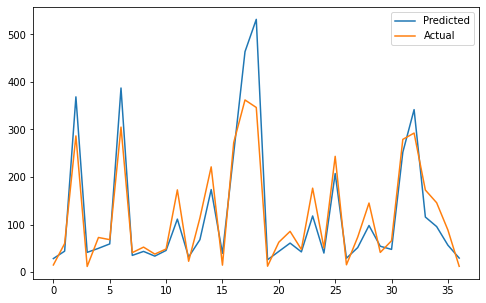

In [102]:
plt.figure(figsize=(8,5))
plt.plot(10**y_pred_elastic)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.show()